<a href="https://colab.research.google.com/github/ElAm1ne/StochasticProcesses/blob/main/Stochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**Question 1**


---


La dynamique (0.1) est donnée par l'équation différentielle stochastique
\begin{equation}
dr_t = a(b - r_t)dt + \gamma dW_t.
\end{equation}
Le schéma d'Euler discretise cette équation pour approximer la solution à chaque pas de temps. Le schéma d'Euler associé à cette dynamique est
\begin{equation}
r_{t+\Delta t} = r_t + a(b - r_t) \Delta t + \gamma \sqrt{\Delta t} Z,
\end{equation}
où $Z$ est un tirage aléatoire à partir d'une distribution normale standard, $N(0,1)$.


---


**Question 2**


---

Le code Python permettant de simuler des trajectoires de r lorsque T = 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class VasicekModel:
    def __init__(self, r0, a, b, gamma, T, dt):
        self.r0 = r0
        self.a = a
        self.b = b
        self.gamma = gamma
        self.T = T
        self.dt = dt
        self.time_grid = np.arange(0, T, dt)

    def generate_path(self, seed=None):
        if seed is not None:
            np.random.seed(seed)

        N = len(self.time_grid)
        r_path = np.zeros(N)
        r_path[0] = self.r0

        for i in range(1, N):
            dW = np.random.normal()
            dr = self.a * (self.b - r_path[i-1]) * self.dt + self.gamma * np.sqrt(self.dt) * dW
            r_path[i] = r_path[i-1] + dr

        return r_path

    def plot_path(self, path):
        plt.plot(self.time_grid, path)
        plt.xlabel('Temps')
        plt.ylabel('Taux d\'intérêt')
        plt.title('Trajectoire du taux d\'intérêt sous le modèle de Vasicek')
        plt.show()

    def zero_coupon_bond_price(self, M=100, seed=None):
        B = np.zeros(M)
        for i in range(M):
            r_path = self.generate_path(seed=seed+i if seed is not None else None)
            integral_r = np.trapz(r_path, dx=self.dt)
            B[i] = np.exp(-integral_r)

        return np.mean(B)

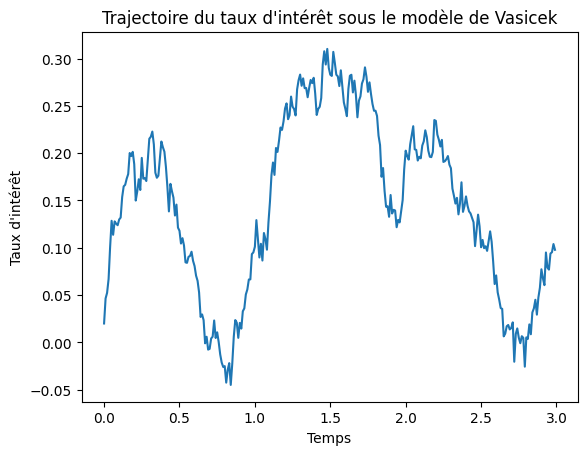

In [2]:
vasicek = VasicekModel(r0=0.02, a=0.1, b=0.01, gamma=0.15, T=3, dt=0.01)
r_path = vasicek.generate_path(seed = 0) #seed = 0 pour bloquer les chiffres aléatoires générer et avoir la même courbe pour tester les résultats
vasicek.plot_path(r_path)


---


**Question 3**


---

Pour approximer l'intégrale $\int_0^T r_u du$, on peut utiliser la méthode des rectangles ou la méthode des trapèzes. Dans ces méthodes, l'intervalle [0, T] est divisé en segments de taille $dt$, et l'intégrale est approximée par la somme des aires de rectangles ou de trapèzes sur ces segments.

Par exemple, avec la méthode des rectangles, l'approximation de l'intégrale est donnée par
$$
\int_0^T r_u du \approx \sum_{i=0}^{N-1} r_{t_i} \Delta t,
$$
où $\Delta t$ est la taille du pas de temps, $N$ est le nombre de pas de temps, et $r_{t_i}$ est la valeur du processus $r$ au temps $t_i$.

Dans notre implémentation, nous avons opté à l'utilisation de la fonction numpy trapz, cette dernière est plus rapide en execution.


---


**Question 4**


---

Le code qui permet alors d’en déduire une approximation du prix ZC : Voir la méthode zero_coupon_bond_price dans la définition de la classe vasicek.

**Explication de l'origine de la formule :**   

C'est une application de la théorie de valorisation par arbitrage, qui stipule qu'en absence d'opportunités d'arbitrage, le prix d'un actif doit être égal à la valeur actuelle de ses paiements futurs attendus.

Ce qui veut dire que le prix actuel d'un bond à coupon zéro est la valeur actuelle du paiement à maturité actualisée à l'aide du taux d'intérêt sans risque pour chaque instant de temps jusqu'à la maturité, le tout sous une probabilité risque-neutre.

In [3]:
vasicek = VasicekModel(r0=0.02, a=0.1, b=0.01, gamma=0.15, T=3, dt=0.01)
B = vasicek.zero_coupon_bond_price(M=1000, seed=0) #Nous avons intentionnellement bloqué les résultats aléatoires à des résultats fixe avec seed = 0 pour avoir le même résultat à chaque test.
print("Prix ZC approximé : ", B)

Prix ZC approximé :  1.0084440742979055


---


**Question 5**


---
La relation entre $S_t$ et $\tilde{S}_t$ :
\begin{equation}
S_t = B(0, t) \tilde{S}_t
\end{equation}

Donc l'actif $S_t$ et le marché obligataire représenté par $B(0, t)$ sont proportionnels par un facteur $\tilde{S}_t$, et donc sont fortement corrélés.

---


**Question 6**


---
Le schéma d'Euler pour l'équation différentielle stochastique (E.D.S.) de l'actif risqué $\tilde{S}$ est
\begin{equation}
\tilde{S}_{t+\Delta t} = \tilde{S}_t + \sigma(t, \tilde{S}_t)\tilde{S}_t \Delta B_t,
\end{equation}
où $\Delta B_t$ est un tirage aléatoire d'une distribution normale standard multipliée par $\sqrt{\Delta t}$.

Ce schéma d'Euler est une approximation de la solution réelle de l'E.D.S, et non la solution exacte. L'erreur d'approximation dépend de la taille de l'intervalle $\Delta t$: plus $\Delta t$ est petit, plus l'approximation est précise.


In [4]:
class RiskyAsset:
    def __init__(self, S0, T, dt):
        self.S0 = S0
        self.T = T
        self.sigma = lambda t, x: 0.1 * (1 + (t/(3*T)) - (x / (1 + x**2)))
        self.dt = dt
        self.time_grid = np.arange(0, T, dt)

    def generate_path(self, r_path, seed=None):
        if seed is not None:
            np.random.seed(seed)

        N = len(self.time_grid)
        S_path = np.zeros(N)
        S_path[0] = self.S0

        for i in range(1, N):
            dB = np.random.normal(0, np.sqrt(self.dt))
            dS = self.sigma(self.time_grid[i], S_path[i-1]) * S_path[i-1] * dB
            S_path[i] = S_path[i-1] + dS

        return S_path

    def calculate_B(self, r_path):
        B_path = np.exp(-np.trapz(r_path, dx = self.dt))
        return B_path

    def plot_path(self, path):
        plt.plot(self.time_grid, path)
        plt.xlabel('Temps')
        plt.ylabel('Prix de l\'actif')
        plt.title('Trajectoire du prix de S tilde')
        plt.show()



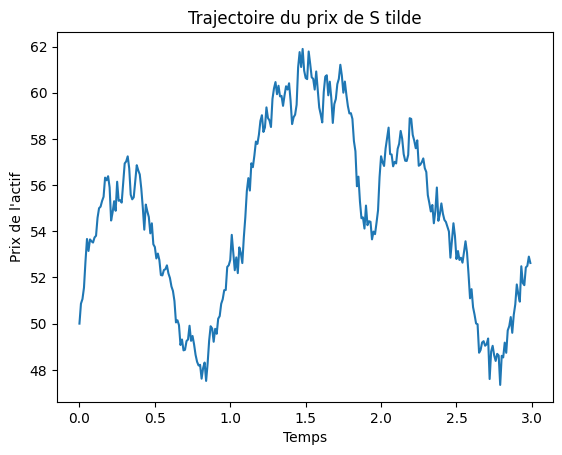

In [5]:
risky_asset = RiskyAsset(S0=50, T=3, dt=0.01)
S_path = risky_asset.generate_path(r_path, seed=0)
risky_asset.plot_path(S_path)

---


**Question 7**


---
Pour simuler les trajectoires de $S$, nous pouvons d'abord générer les trajectoires de $r$ et $\tilde{S}$, puis utiliser la relation entre $S$, $B(0, t)$ et $\tilde{S}$. Nous avons :

$S_t = B(0, t) \tilde{S}_t\$

Tout d'abord, nous générons la trajectoire de $r$ en utilisant la classe `VasicekModel`. Ensuite, nous calculons le prix du zéro-coupon $B(0, t)$ à chaque instant $t$ en utilisant l'approximation discrète de l'intégrale de $r$ sur $[0, t]$ comme détaillé précédemment. Ensuite, nous générons la trajectoire de $\tilde{S}$ en utilisant la classe `RiskyAsset`.

Finalement, nous calculons la trajectoire de $S$ en multipliant $B(0, t)$ et $\tilde{S}$ à chaque instant $t$.


In [6]:
class AssetPrice:
    def __init__(self, S0, vasicek, risky_asset, T, dt):
        self.S0 = S0
        self.vasicek = vasicek
        self.risky_asset = risky_asset
        self.T = T
        self.dt = dt
        self.time_grid = np.arange(0, T, dt)

    def generate_path(self, seed=None):
        if seed is not None:
            np.random.seed(seed)

        r_path = self.vasicek.generate_path(seed=seed)
        Stilde_path = self.risky_asset.generate_path(r_path, seed=seed)

        N = len(self.time_grid)
        B_path = np.zeros(N)
        S_path = np.zeros(N)
        B_path[0] = 1
        S_path[0] = self.S0

        for i in range(1, N):
            B_path[i] = B_path[i-1] * np.exp(-r_path[i-1] * self.dt)
            S_path[i] = B_path[i] * Stilde_path[i]

        return S_path

    def plot_path(self, path):
        plt.plot(self.time_grid, path)
        plt.xlabel('Temps')
        plt.ylabel('Prix de l\'actif')
        plt.title('Trajectoire du prix de l\'actif S')
        plt.show()


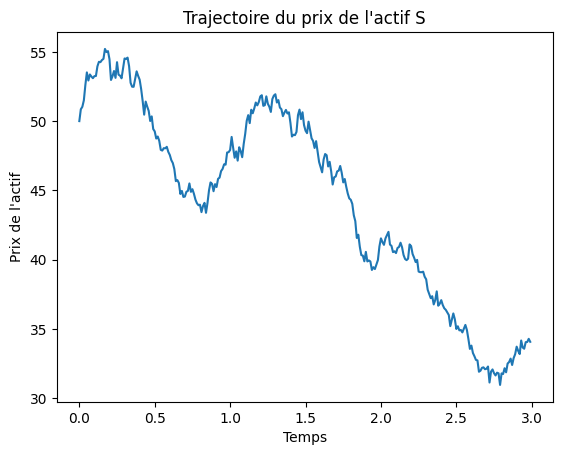

In [7]:
asset_price = AssetPrice(S0=50, vasicek=vasicek, risky_asset=risky_asset, T=3, dt=0.01)
S_path = asset_price.generate_path(seed=0)
asset_price.plot_path(S_path)


---


**Question 8**


---
Dans un marché complet sans opportunité d'arbitrage, le prix d'une option de payoff terminal $\xi_T$ à l'instant $T$ est donné par la formule d'évaluation par risque neutre, qui stipule que le prix d'une option est la valeur actuelle espérée de son payoff futur sous la probabilité de risque neutre $Q$. Mathématiquement, cela est exprimé comme suit :

$ C_0 = E_Q\left[e^{-\int_0^T r_u du} \xi_T\right]$

où $C_0$ est le prix de l'option à l'instant $t=0$, $r_u$ est le taux d'intérêt sans risque à l'instant $u$ (un processus stochastique dans ce cas), $T$ est la date d'expiration de l'option, $E_Q[\cdot]$ désigne l'espérance sous la probabilité de risque neutre $Q$, et $\xi_T$ est le payoff de l'option à l'instant $T$.

Pour approximer numériquement le prix de l'option, on peut utiliser la méthode de Monte Carlo, qui repose sur la simulation de plusieurs trajectoires du sous-jacent (ici, le prix de l'actif $S$) et le calcul de la moyenne des payoffs actualisés sur ces trajectoires. La loi des grands nombres assure que cette moyenne converge vers l'espérance recherchée lorsque le nombre de simulations tend vers l'infini.

L'approximation de Monte Carlo du prix de l'option est donc :

$\hat{C}_0 = \frac{1}{N} \sum_{i=1}^{N} e^{-\int_0^T r_u^{(i)} du} \xi_T(S^{(i)})$

où $N$ est le nombre de trajectoires simulées, $S^{(i)}$ est la $i$-ème trajectoire simulée du prix de l'actif, et $r_u^{(i)}$ est la trajectoire simulée du taux d'intérêt sans risque.

De même pour le calcul de l'intégrale, nous optons pour np.trapz afin d'améliorer les performances de l'algorithme.


---


**Question 9**


---

Pour estimer les prix des options européenne et asiatique, nous allons utiliser la méthode de Monte Carlo. Cette méthode repose sur le calcul du payoff moyen de l'option sur un grand nombre de trajectoires simulées de l'actif sous-jacent et de la valeur du taux d'intérêt sans risque.

**Option européenne**

In [8]:
class EuropeanOption:
    def __init__(self, K, T, risky_asset_model, vasicek_model):
        self.K = K
        self.T = T
        self.risky_asset_model = risky_asset_model
        self.vasicek_model = vasicek_model

    def payoff(self, S_T):
        return max(self.K - S_T, 0)

    def price(self, num_simulations,seed=None):
        total_payoff = 0
        for _ in range(num_simulations):
            r_path = self.vasicek_model.generate_path(seed=seed)
            S_path = self.risky_asset_model.generate_path(r_path, seed=seed)
            B = self.risky_asset_model.calculate_B(r_path)
            S_T = S_path[-1]
            total_payoff += self.payoff(S_T) / B
        return total_payoff / num_simulations

**Option asiatique**

In [9]:
class AsianOption:
    def __init__(self, K, T, risky_asset_model, vasicek_model):
        self.K = K
        self.T = T
        self.risky_asset_model = risky_asset_model
        self.vasicek_model = vasicek_model

    def payoff(self, S_path):
        avg_S = np.mean(S_path)
        return max(avg_S - self.K, 0)

    def price(self, num_simulations, seed=None):
        total_payoff = 0
        for _ in range(num_simulations):
            r_path = self.vasicek_model.generate_path(seed=seed)
            S_path = self.risky_asset_model.generate_path(r_path, seed=seed)
            B = self.risky_asset_model.calculate_B(r_path)
            total_payoff += self.payoff(S_path) / B
        return total_payoff / num_simulations

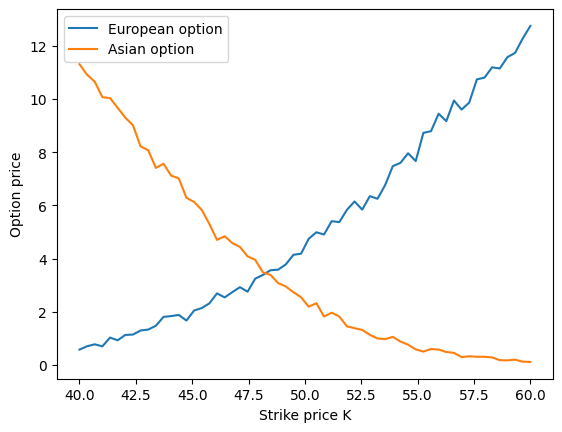

In [10]:
vasicek_model = VasicekModel(r0=0.02, a=0.1, b=0.01, gamma=0.15, T=3, dt=0.01)
risky_asset_model = RiskyAsset(S0=50, T=3, dt=0.01)
K_values = np.linspace(40, 60, 60)
european_option_prices = []
asian_option_prices = []
T = 3
for K in K_values:
    european_option = EuropeanOption(K, T, risky_asset_model, vasicek_model)
    asian_option = AsianOption(K, T, risky_asset_model, vasicek_model)
    european_option_prices.append(european_option.price(1000))
    asian_option_prices.append(asian_option.price(1000))

plt.plot(K_values, european_option_prices, label='European option')
plt.plot(K_values, asian_option_prices, label='Asian option')
plt.xlabel('Strike price K')
plt.ylabel('Option price')
plt.legend()
plt.show()